In [26]:
# adaboost gradientboost clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
url = 'data/heart_disease_ind_2015.csv'

df = pd.read_csv(url)

In [3]:
# setup baseline
df.HeartDiseaseorAttack.value_counts(normalize=True)

0.0    0.905814
1.0    0.094186
Name: HeartDiseaseorAttack, dtype: float64

In [4]:
X = df.drop(columns='HeartDiseaseorAttack')
y = df['HeartDiseaseorAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [5]:
pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier(random_state=1))
])

pipe_grad = Pipeline([
    ('ss', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=1))
])

pipe_km = Pipeline([
    ('ss', StandardScaler()),
    ('km', KMeans(random_state=1))
])

pipe_dbs = Pipeline([
    ('ss', StandardScaler()),
    ('dbs', DBSCAN())
])

pipe_xgb = Pipeline([
    ('ss', StandardScaler()),
    ('xgb', xgb.XGBClassifier())
])

In [6]:
pipe_ada.fit(X_train, y_train)

pipe_ada.score(X_train, y_train), pipe_ada.score(X_test, y_test)

(0.9071638810049406, 0.9073478397981709)

In [7]:
pipe_grad.fit(X_train, y_train)

pipe_grad.score(X_train, y_train), pipe_grad.score(X_test, y_test)

(0.908525176074845, 0.9079943235572374)

In [8]:
pipe_xgb.fit(X_train, y_train)

pipe_xgb.score(X_train, y_train), pipe_xgb.score(X_test, y_test)

(0.9147902869757174, 0.9070167139703563)

In [22]:
pipe_km.fit(df)

silhouette_score(pipe_km['ss'].fit_transform(df), pipe_km['km'].labels_), pipe_km['km'].inertia_

(0.08162067175369862, 4688375.300274653)

now evaluating k=2
now evaluating k=3
now evaluating k=4
now evaluating k=5
now evaluating k=6
now evaluating k=7
now evaluating k=8
now evaluating k=9
now evaluating k=10
now evaluating k=11
now evaluating k=12
now evaluating k=13
now evaluating k=14
now evaluating k=15


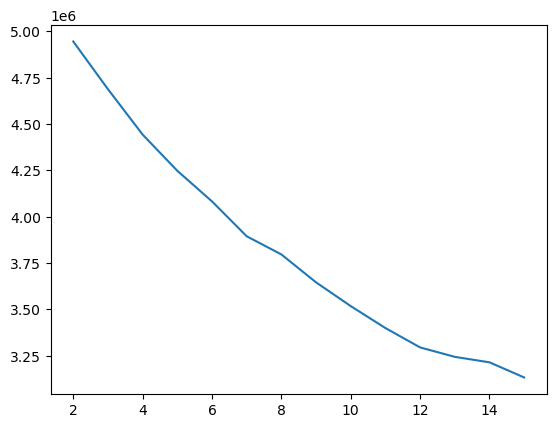

In [27]:
scores = []

for k in range(2, 16):
    print(f'now evaluating k={k}')
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(pipe_km['ss'].fit_transform(df))
    scores.append([k, kmeans.inertia_])

inertia_df = pd.DataFrame(scores, columns=['n_clusters', 'inertia'])
plt.plot(inertia_df['n_clusters'], inertia_df['inertia'])

In [23]:
pipe_dbs.fit(df)

silhouette_score(pipe_dbs['ss'].fit_transform(df), pipe_dbs['dbs'].labels_)

-0.34113081792698824